In [458]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [274]:
df_clean= pd.read_csv('cleaned_data.csv')


/var/folders/87/8lkk6ykj1_74chh73s5bkg8r0000gn/T/ipykernel_46847/3521527592.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clean= pd.read_csv('cleaned_data.csv')


In [275]:
df_clean.columns


Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'Variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')

In [278]:
df_clean = df_clean.rename(columns={'Variation': 'variation'})

In [280]:
df_clean.columns

Index(['client_id', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr',
       'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'variation',
       'visitor_id', 'visit_id', 'process_step', 'date_time'],
      dtype='object')

In [282]:
df_clean.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
variation            object
visitor_id           object
visit_id             object
process_step         object
date_time            object
dtype: object

In [284]:
df_clean.size

6214558

In [286]:
df_clean.head()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:51:13
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:47:50
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_3,2017-04-02 11:23:08
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24


In [288]:
df_clean.shape


(443897, 14)

In [290]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443897 entries, 0 to 443896
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         443897 non-null  int64  
 1   clnt_tenure_yr    443784 non-null  float64
 2   clnt_tenure_mnth  443784 non-null  float64
 3   clnt_age          443772 non-null  float64
 4   gendr             443784 non-null  object 
 5   num_accts         443784 non-null  float64
 6   bal               443784 non-null  float64
 7   calls_6_mnth      443784 non-null  float64
 8   logons_6_mnth     443784 non-null  float64
 9   variation         317235 non-null  object 
 10  visitor_id        443897 non-null  object 
 11  visit_id          443897 non-null  object 
 12  process_step      443897 non-null  object 
 13  date_time         443897 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 47.4+ MB


In [292]:
df_clean.duplicated().sum()

0

## droping missing values

In [295]:
df_clean.isnull().sum()

client_id                0
clnt_tenure_yr         113
clnt_tenure_mnth       113
clnt_age               125
gendr                  113
num_accts              113
bal                    113
calls_6_mnth           113
logons_6_mnth          113
variation           126662
visitor_id               0
visit_id                 0
process_step             0
date_time                0
dtype: int64

In [297]:
df_clean["clnt_tenure_yr"].unique()

array([ 6.,  7.,  5., 16., 12., 30., 15.,  8.,  4.,  3., 10., 11., 13.,
       14., 19., 18., 25., 23., 21., 17.,  9., 27., 24., 20., 28., 22.,
       29., 46., 26., 32., 33., 35.,  2., 38., 31., 48., 34., 36., 51.,
       nan, 47., 49., 37., 39., 40., 55., 42., 44., 43., 50., 54., 41.,
       45., 52., 62.])

In [299]:
df_clean["clnt_tenure_yr"].isnull().sum()

113

In [301]:
#cleaning lot of missing values
df_clean = df_clean.dropna()
df_clean.isnull().sum()

client_id           0
clnt_tenure_yr      0
clnt_tenure_mnth    0
clnt_age            0
gendr               0
num_accts           0
bal                 0
calls_6_mnth        0
logons_6_mnth       0
variation           0
visitor_id          0
visit_id            0
process_step        0
date_time           0
dtype: int64

In [303]:
df_clean["bal"].unique()

array([ 45105.3 , 110860.3 ,  52467.79, ...,  44837.16,  44994.24,
       209278.15])

## Rounded numbers in bal column


In [306]:
# rounded numbers in balance
df_clean["bal"]= df_clean["bal"].round(2)


In [308]:
df_clean.loc[:, "bal"] = df_clean["bal"].round(2)


In [310]:
df_clean["bal"]

0          45105.30
1          45105.30
2          45105.30
3          45105.30
4          45105.30
            ...    
317230    209278.15
317231    209278.15
317232    209278.15
317233    209278.15
317234    209278.15
Name: bal, Length: 317123, dtype: float64

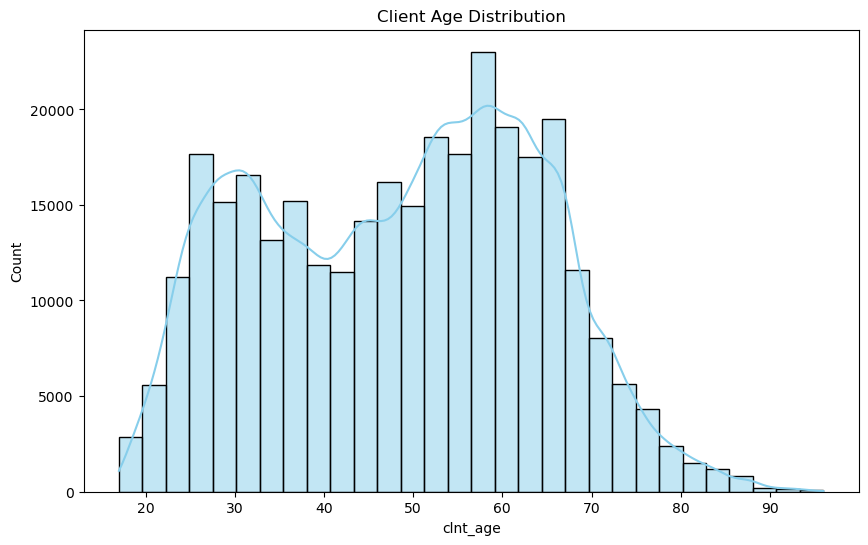

In [475]:
plt.figure(figsize=(10, 6))  
sns.histplot(df_clean['clnt_age'], bins=30, kde=True, color='skyblue')
plt.title("Client Age Distribution")
plt.savefig('Client_age_distribution.png')
plt.show()



## KPI

# completeion rate

In [317]:
# For 'Test' group:
completion_test = df_clean[(df_clean['variation'] == 'Test') & (df_clean['process_step'] == 'confirm')]['visitor_id'].nunique() / df_clean[df_clean['variation'] == 'Test']['visitor_id'].nunique()

# For 'Control' group:
completion_control = df_clean[(df_clean['variation'] == 'Control') & (df_clean['process_step'] == 'confirm')]['visitor_id'].nunique() / df_clean[df_clean['variation'] == 'Control']['visitor_id'].nunique()

print(f"Test Completion Rate: {completion_test}")
print(f"Control Completion Rate: {completion_control}")

Test Completion Rate: 0.6519660291560786
Control Completion Rate: 0.5922880743024628


In [319]:
# Convert 'date_time' to datetime format
df_clean['date_time'] = pd.to_datetime(df_clean['date_time'], errors='coerce')
#Sort the data by 'visit_id' and 'date_time' to ensure correct time sequence
df_clean = df_clean.sort_values(by=['visit_id', 'date_time'])


df_clean['time_spent'] = df_clean.groupby('visit_id')['date_time'].diff().dt.total_seconds()
avg_time_per_step = df_clean.groupby('process_step')['time_spent'].mean()

print(avg_time_per_step)

process_step
confirm    129.751824
start      162.416480
step_1      40.123008
step_2      43.984299
step_3      95.868958
Name: time_spent, dtype: float64


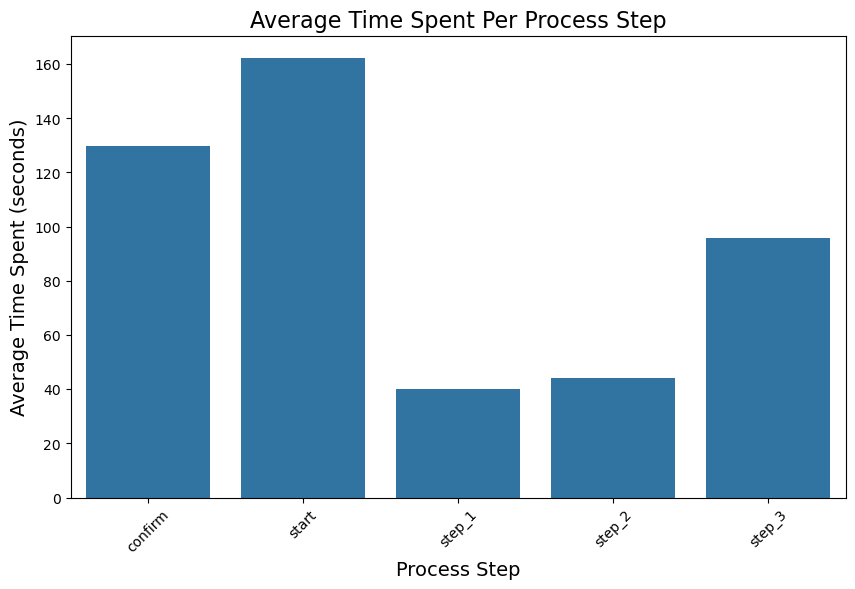

In [479]:
plt.figure(figsize=(10, 6))  
sns.barplot(x=avg_time_per_step.index, y=avg_time_per_step.values);

# Adding labels and title
plt.title('Average Time Spent Per Process Step', fontsize=16);
plt.xlabel('Process Step', fontsize=14);
plt.ylabel('Average Time Spent (seconds)', fontsize=14);
plt.xticks(rotation=45);

plt.savefig('Average_time_spent_per_process_step.png')

plt.show()

Hypotheses:
Null Hypothesis (H₀): There is no difference in completion rates between the Test and Control groups. (i.e., the completion rate in the Test group is equal to the Control group)

Alternative Hypothesis (H₁): There is a significant difference in completion rates between the Test and Control groups. (i.e., the completion rate in the Test group is higher than the Control group)

If the p-value is less than 0.05, we reject the null hypothesis, meaning there is a statistically significant difference between the completion rates of the Test and Control groups.
If the p-value is greater than 0.05, we fail to reject the null hypothesis, meaning there is no statistically significant difference.

In [326]:
from statsmodels.stats.proportion import proportions_ztest

# Defining the number of successes (completed process) and total trials (total visitors) for both groups
success_test = df_clean[(df_clean['variation'] == 'Test') & (df_clean['process_step'] == 'confirm')]['visitor_id'].nunique()
total_test = df_clean[df_clean['variation'] == 'Test']['visitor_id'].nunique()

success_control = df_clean[(df_clean['variation'] == 'Control') & (df_clean['process_step'] == 'confirm')]['visitor_id'].nunique()
total_control = df_clean[df_clean['variation'] == 'Control']['visitor_id'].nunique()

# Perform z-test for proportions
count = [success_test, success_control]
nobs = [total_test, total_control]

z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')  # One-sided test (test if Test group is greater)

print(f"Z-statistic: {z_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Compare p-value with significance level (alpha)
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. The Test group has a significantly higher completion rate.")
else:
    print("Fail to reject the null hypothesis. No significant difference in completion rates.")


Z-statistic: 14.5709
P-value: 0.0000
Reject the null hypothesis. The Test group has a significantly higher completion rate.


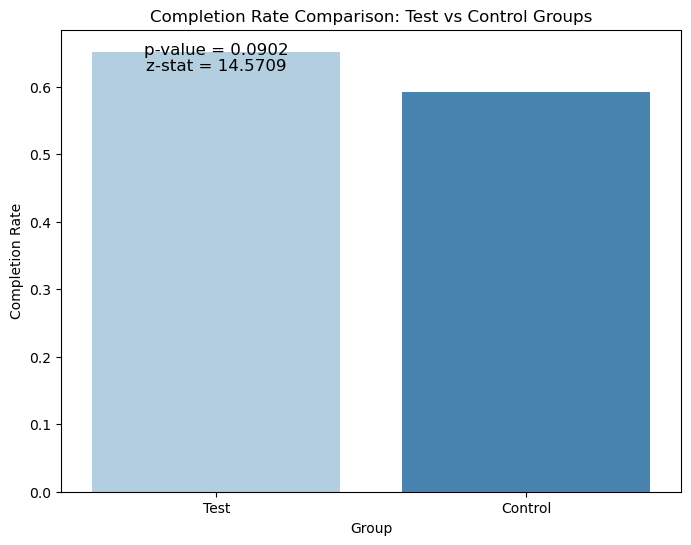

In [481]:
completion_rates = {
    'Group': ['Test', 'Control'],
    'Completion Rate': [success_test / total_test, success_control / total_control]
}

# Convert to DataFrame
completion_df = pd.DataFrame(completion_rates)

# Create bar plot to compare completion rates between Test and Control
plt.figure(figsize=(8, 6))
sns.barplot(x='Group', y='Completion Rate', data=completion_df, hue='Group', palette='Blues', legend=False)

# Adding z-statistic and p-value as text on the plot with adjusted positions
plt.text(0, completion_df['Completion Rate'][1] + 0.032, f"z-stat = {z_stat:.4f}", ha='center', fontsize=12, color='black')
plt.text(0, completion_df['Completion Rate'][1] + 0.055, f"p-value = {p_value:.4f}", ha='center', fontsize=12, color='black')

# Set plot titles and labels
plt.title('Completion Rate Comparison: Test vs Control Groups')
plt.xlabel('Group')
plt.ylabel('Completion Rate')

# Show the plot
plt.savefig('Completion_rate.png')

plt.show()

The difference in completion rates can be visually seen as the height of the bars in the bar plot.
The z-statistic and p-value help to quantify and validate whether this difference is statistically significant.
If the p-value is below your threshold (e.g., 0.05), it indicates that the observed difference in completion rates between the Test and Control groups is statistically significant.


## Erorr rate


In [332]:
# Calculate the percentage increase in completion rate
completion_rate_test = success_test / total_test
completion_rate_control = success_control / total_control

percentage_increase = ((completion_rate_test - completion_rate_control) / completion_rate_control) * 100
print(f"Percentage Increase in Completion Rate: {percentage_increase:.2f}%")

# Check if it meets the 5% threshold
threshold = 5
if percentage_increase >= threshold:
    print("The new design meets the cost-effectiveness threshold.")
else:
    print("The new design does not meet the cost-effectiveness threshold.")

Percentage Increase in Completion Rate: 10.08%
The new design meets the cost-effectiveness threshold.


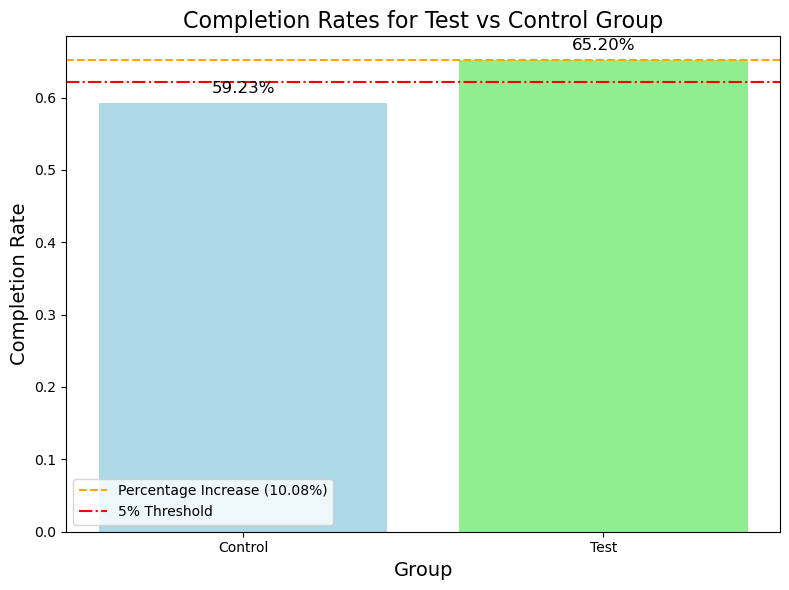

In [483]:
completion_rates = [completion_rate_control, completion_rate_test]
groups = ['Control', 'Test']
colors = ['lightblue', 'lightgreen']

# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(groups, completion_rates, color=colors)

# Add percentage increase annotation
plt.axhline(y=completion_rate_control + (percentage_increase / 100 * completion_rate_control), 
            color='orange', linestyle='--', label=f'Percentage Increase ({percentage_increase:.2f}%)')

# Add labels and title
plt.title('Completion Rates for Test vs Control Group', fontsize=16)
plt.xlabel('Group', fontsize=14)
plt.ylabel('Completion Rate', fontsize=14)

# Annotate the bars with the exact percentage values
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f'{yval:.2%}', ha='center', va='bottom', fontsize=12)

# Add a horizontal line to indicate the 5% threshold
plt.axhline(y=completion_rate_control + (0.05 * completion_rate_control), color='red', linestyle='-.', label='5% Threshold')

# Add legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.savefig('Completion_rate_error_rate.png')

plt.show()

If the percentage increase is greater than or equal to 5%, the new design can be considered cost-effective, justifying its introduction.


If the increase is below 5%, the design may not be considered cost-effective.

Once the completion rates are calculated, the percentage increase is calculated by comparing the test group’s completion rate to the control group’s rate.  the percentage increase is 10.08%, meaning that the completion rate in the test group is 10.08% higher than in the control group.

The code compares the percentage increase with the threshold:

If the percentage increase is greater than or equal to 5%, the message "The new design meets the cost-effectiveness threshold." is printed.
If the percentage increase is less than 5%, the message "The new design does not meet the cost-effectiveness threshold." is printed.


Summary:
Percentage Increase in Completion Rate: 10.08% — This shows that the new design outperforms the old design by 10.08% in terms of successful completions.
Cost-Effectiveness Threshold: 5% — Since the percentage increase is above 5%, the new design meets the threshold for being cost-effective.


# Gender


Null Hypothesis (H₀): There is no difference in the completion rate between genders in the Test and Control groups.

Alternative Hypothesis (H₁): There is a significant difference in completion rates between genders in either the Test or Control group.

In [407]:
df_clean['gendr'].unique()

array(['U', 'M', 'F', 'X'], dtype=object)

In [409]:
#cleaning gender column removing unknown, other
df_gender_clean = df_clean[df_clean['gendr'].isin(['M', 'F'])]
df_gender_clean['gendr'].unique()

array(['M', 'F'], dtype=object)

In [411]:
completion_gender_test = df_clean[(df_clean['variation'] == 'Test') & (df_gender_clean['process_step'] == 'confirm')].groupby('gendr')['visitor_id'].nunique()
completion_gender_control = df_clean[(df_clean['variation'] == 'Control') & (df_gender_clean['process_step'] == 'confirm')].groupby('gendr')['visitor_id'].nunique()

# Perform z-test for each gender group comparison
count_gender_test = completion_gender_test.values
total_gender_test = df_gender_clean[(df_gender_clean['variation'] == 'Test')].groupby('gendr')['visitor_id'].nunique().values

count_gender_control = completion_gender_control.values
total_gender_control = df_gender_clean[(df_gender_clean['variation'] == 'Control')].groupby('gendr')['visitor_id'].nunique().values

# Perform z-test for gender
z_stat_gender, p_value_gender = proportions_ztest([count_gender_test.sum(), count_gender_control.sum()], [total_gender_test.sum(), total_gender_control.sum()], alternative='two-sided')

print(f"Z-statistic for gender difference: {z_stat_gender:.4f}")
print(f"P-value for gender difference: {p_value_gender:.4f}")

if p_value_gender < 0.05:
    print("There is a significant gender difference in completion rates.")
else:
    print("There is no significant gender difference in completion rates.")

Z-statistic for gender difference: 11.7986
P-value for gender difference: 0.0000
There is a significant gender difference in completion rates.


/var/folders/87/8lkk6ykj1_74chh73s5bkg8r0000gn/T/ipykernel_46847/4089635669.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  completion_gender_test = df_clean[(df_clean['variation'] == 'Test') & (df_gender_clean['process_step'] == 'confirm')].groupby('gendr')['visitor_id'].nunique()
/var/folders/87/8lkk6ykj1_74chh73s5bkg8r0000gn/T/ipykernel_46847/4089635669.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  completion_gender_control = df_clean[(df_clean['variation'] == 'Control') & (df_gender_clean['process_step'] == 'confirm')].groupby('gendr')['visitor_id'].nunique()


In [413]:

# Calculate the completion rate for each gender in both groups (Test and Control)
completion_gender_test = df_clean[(df_clean['variation'] == 'Test') & (df_clean['process_step'] == 'confirm')].groupby('gendr')['visitor_id'].nunique()
completion_gender_control = df_clean[(df_clean['variation'] == 'Control') & (df_clean['process_step'] == 'confirm')].groupby('gendr')['visitor_id'].nunique()

# Perform z-test for each gender group comparison
count_gender_test = completion_gender_test.values
total_gender_test = df_clean[(df_clean['variation'] == 'Test')].groupby('gendr')['visitor_id'].nunique().values

count_gender_control = completion_gender_control.values
total_gender_control = df_clean[(df_clean['variation'] == 'Control')].groupby('gendr')['visitor_id'].nunique().values

# Perform z-test for gender
z_stat_gender, p_value_gender = proportions_ztest([count_gender_test.sum(), count_gender_control.sum()], [total_gender_test.sum(), total_gender_control.sum()], alternative='two-sided')

print(f"Z-statistic for gender difference: {z_stat_gender:.4f}")
print(f"P-value for gender difference: {p_value_gender:.4f}")

if p_value_gender < 0.05:
    print("There is a significant gender difference in completion rates.")
else:
    print("There is no significant gender difference in completion rates.")


Z-statistic for gender difference: 14.5914
P-value for gender difference: 0.0000
There is a significant gender difference in completion rates.


In [438]:
completion_gender_test , completion_gender_control

(gendr
 F    6128
 M    6710
 U    6720
 Name: visitor_id, dtype: int64,
 gendr
 F    4846
 M    5381
 U    5379
 Name: visitor_id, dtype: int64)

In [415]:
# chi test
import pandas as pd
import scipy.stats as stats

# Create the contingency table for gender vs completion status in both Test and Control groups
contingency_table = pd.crosstab(
    [df_clean['variation'], df_clean['gendr']],  # Rows: variation (Test/Control), gender
    df_clean['process_step'] == 'confirm'  # Columns: completion status (True/False)
)

# Rename columns for clarity
contingency_table.columns = ['Not Completed', 'Completed']

# Display the contingency table
print("Contingency Table:")
print(contingency_table)

# Perform Chi-Square Test for Independence
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the results
print(f"Chi-Square Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in completion rates between genders.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in completion rates between genders.")


Contingency Table:
                 Not Completed  Completed
variation gendr                          
Control   F              39165       5464
          M              41427       5988
          U              42561       5877
Test      F              50018       8151
          M              50366       8922
          U              50655       8521
          X                  8          0
Chi-Square Statistic: 344.6835
P-value: 0.0000
Degrees of Freedom: 6
Expected Frequencies: 
[[3.85884083e+04 6.04059172e+03]
 [4.09973197e+04 6.41768035e+03]
 [4.18818553e+04 6.55614469e+03]
 [5.02957521e+04 7.87324788e+03]
 [5.12632941e+04 8.02470595e+03]
 [5.11664534e+04 8.00954660e+03]
 [6.91718986e+00 1.08281014e+00]]
Reject the null hypothesis. There is a significant difference in completion rates between genders.


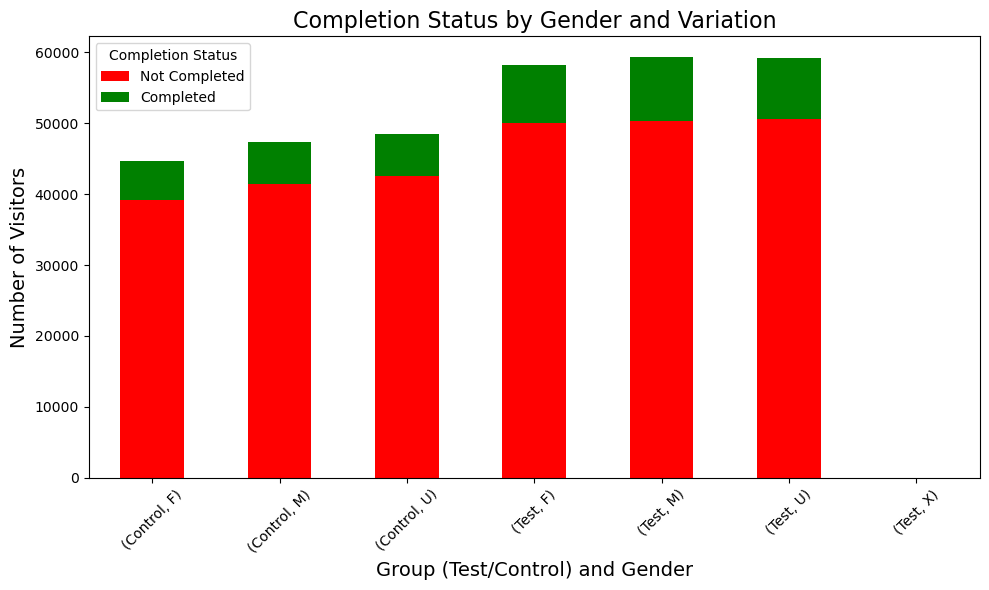

In [417]:
contingency_table = pd.crosstab(
    [df_clean['variation'], df_clean['gendr']],  # Rows: variation (Test/Control), gender
    df_clean['process_step'] == 'confirm'  # Columns: completion status (True/False)
)

# Rename columns for clarity
contingency_table.columns = ['Not Completed', 'Completed']

# Plot the stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])

# Add titles and labels
plt.title('Completion Status by Gender and Variation', fontsize=16)
plt.xlabel('Group (Test/Control) and Gender', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=14)
plt.xticks(rotation=45)

# Add a legend
plt.legend(title="Completion Status", labels=['Not Completed', 'Completed'])

# Show the plot
plt.tight_layout()
plt.show()

# gender test with just M and F

In [394]:
from statsmodels.stats.proportion import proportions_ztest

# 
count_gender_test_2 = completion_gender_test_2.values
total_gender_test_2 = df_gender_clean[(df_gender_clean['variation'] == 'Test')].groupby('gendr')['visitor_id'].nunique().values

count_gender_control_2 = completion_gender_control_2.values
total_gender_control_2 = df_gender_clean[(df_gender_clean['variation'] == 'Control')].groupby('gendr')['visitor_id'].nunique().values

# Perform z-test for gender comparison between Test and Control groups
z_stat_gender_2, p_value_gender_2 = proportions_ztest(
    [count_gender_test_2.sum(), count_gender_control_2.sum()],  # Success counts (completions)
    [total_gender_test_2.sum(), total_gender_control_2.sum()],  # Total sample sizes
    alternative='two-sided'
)

# Output results
print(f"Z-statistic for gender difference: {z_stat_gender_2:.4f}")
print(f"P-value for gender difference: {p_value_gender_2:.4f}")

# Interpretation of p-value
if p_value_gender_2 < 0.05:
    print("There is a significant gender difference in completion rates.")
else:
    print("There is no significant gender difference in completion rates.")


Z-statistic for gender difference: 11.7986
P-value for gender difference: 0.0000
There is a significant gender difference in completion rates.


The Z-test is very sensitive to large sample sizes. When the sample size is large enough, even small effects can appear statistically significant, and the p-value can approach 0.
If this difference is consistent across a large sample, the z-statistic becomes large, and the p-value becomes very small.

The z-statistic of 11.7986 is very large, which indicates a very strong difference between the proportions of the two groups (Test vs. Control). Z-scores above 3 or -3 generally suggest a significant difference, and in your case, the large value means the difference is far from the null hypothesis (no difference).

 Even small differences, when observed in very large samples, can produce highly significant results. So, while the difference is statistically significant, it's important to assess whether the 5.95% difference in completion rates is practically meaningful in your specific context.

 In short: The p-value is low because the difference between the groups is substantial, the sample sizes are likely large, and the data variability is low, making the result highly statistically significant.

In [396]:
print("Test Group Completion Proportions by Gender:")
print(completion_gender_test_2 / total_gender_test_2)

print("Control Group Completion Proportions by Gender:")
print(completion_gender_control_2 / total_gender_control_2)


Test Group Completion Proportions by Gender:
gendr
F    0.627740
M    0.666667
Name: visitor_id, dtype: float64
Control Group Completion Proportions by Gender:
gendr
F    0.573967
M    0.601229
Name: visitor_id, dtype: float64


In [398]:
print("Total Visitors in Test Group by Gender:")
print(total_gender_test_2)

print("Total Visitors in Control Group by Gender:")
print(total_gender_control_2)

Total Visitors in Test Group by Gender:
[ 9762 10065]
Total Visitors in Control Group by Gender:
[8443 8950]


In [400]:
proportion_test = completion_gender_test_2 / total_gender_test_2
proportion_control = completion_gender_control_2 / total_gender_control_2

proportion_diff = proportion_test - proportion_control
print(f"Difference in Proportions: {proportion_diff}")

Difference in Proportions: gendr
F    0.053774
M    0.065438
Name: visitor_id, dtype: float64


In [441]:
prop_test = count_gender_test_2.sum() / total_gender_test_2.sum()
prop_control = count_gender_control_2.sum() / total_gender_control_2.sum()

print(f"Completion rate for Test group: {prop_test:.4f}")
print(f"Completion rate for Control group: {prop_control:.4f}")


Completion rate for Test group: 0.6475
Completion rate for Control group: 0.5880


If the p-value from the z-test is less than 0.05, it indicates that the difference between the two completion rates is statistically significant at the 5% significance level.

Since the p-value from the z-test is 0.0000, it indicates that the difference in completion rates between the Test and Control groups is highly statistically significant. Even though the absolute difference in proportions (5.95%) might seem modest, with large enough sample sizes (as suggested by the z-test), even small differences can be significant. This is especially true when the sample sizes are large, as in your case, which increases the power of the test.

In [402]:
# chi test

import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table for gender and completion rate
# Completed (process_step = 'confirm')
completion_test = df_gender_clean[(df_gender_clean['variation'] == 'Test') & (df_gender_clean['process_step'] == 'confirm')]
completion_control = df_gender_clean[(df_gender_clean['variation'] == 'Control') & (df_gender_clean['process_step'] == 'confirm')]

# Not completed (those who were in the group but did not reach 'confirm')
not_completion_test = df_gender_clean[(df_gender_clean['variation'] == 'Test') & (df_gender_clean['process_step'] != 'confirm')]
not_completion_control = df_gender_clean[(df_gender_clean['variation'] == 'Control') & (df_gender_clean['process_step'] != 'confirm')]

# Create the contingency table by counting completed and not completed visitors by group and gender
contingency_table = pd.DataFrame({
    'Test Completed': [len(completion_test[completion_test['gendr'] == gender]) for gender in df_gender_clean['gendr'].unique()],
    'Test Not Completed': [len(not_completion_test[not_completion_test['gendr'] == gender]) for gender in df_gender_clean['gendr'].unique()],
    'Control Completed': [len(completion_control[completion_control['gendr'] == gender]) for gender in df_gender_clean['gendr'].unique()],
    'Control Not Completed': [len(not_completion_control[not_completion_control['gendr'] == gender]) for gender in df_gender_clean['gendr'].unique()]
})

# Perform the chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Display results
print(f"Chi-squared Statistic: {chi2_stat:.4f}")
print(f"P-value: {p_value:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected frequencies:\n{expected}")

# Interpretation
if p_value < 0.05:
    print("There is a significant association between group (Test/Control) and gender completion rates.")
else:
    print("There is no significant association between group (Test/Control) and gender completion rates.")




Chi-squared Statistic: 50.7188
P-value: 0.0000
Degrees of Freedom: 3
Expected frequencies:
[[ 8695.61634073 51127.55524795  5832.72994401 41047.09846731]
 [ 8377.38365927 49256.44475205  5619.27005599 39544.90153269]]
There is a significant association between group (Test/Control) and gender completion rates.


A Chi-squared statistic of 50.7188 typically suggests a significant association between the variables you're testing, assuming the p-value is small (usually < 0.05). This means that gender and completion rates (Test vs. Control) are not independent of each other.

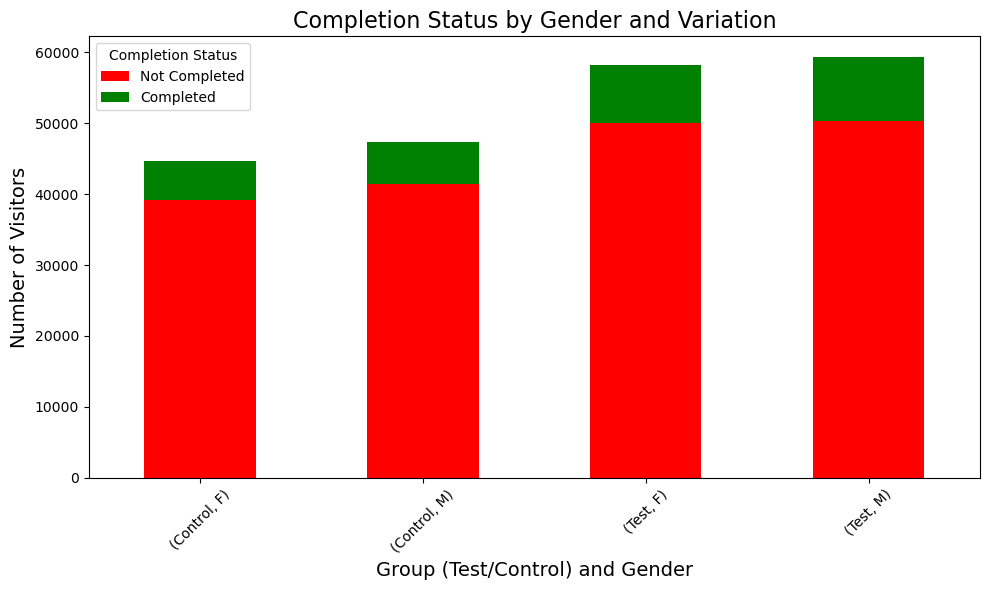

In [485]:
contingency_table = pd.crosstab(
    [df_gender_clean['variation'], df_gender_clean['gendr']],  # Rows: variation (Test/Control), gender
    df_gender_clean['process_step'] == 'confirm'  # Columns: completion status (True/False)
)

# columns
contingency_table.columns = ['Not Completed', 'Completed']

# Plot the stacked bar chart
contingency_table.plot(kind='bar', stacked=True, figsize=(10, 6), color=['red', 'green'])

# titles and labels
plt.title('Completion Status by Gender and Variation', fontsize=16)
plt.xlabel('Group (Test/Control) and Gender', fontsize=14)
plt.ylabel('Number of Visitors', fontsize=14)
plt.xticks(rotation=45)

# Add a legend
plt.legend(title="Completion Status", labels=['Not Completed', 'Completed'])


plt.tight_layout()
plt.savefig('Completion_by_gender.png')

plt.show()

# gender with outliers






In [195]:
import pandas as pd

# Function to detect outliers using IQR for numeric columns
def detect_outliers(df, column):
    # Ensure the column is numeric, if not, skip the outlier detection
    if pd.api.types.is_numeric_dtype(df[column]):
        # Calculate the first and third quartile (Q1 and Q3) of the specified column
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1  # Interquartile Range
        
        # Calculate lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find the outliers: rows where the column values are outside the bounds
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        return outliers
    else:
        # If the column is not numeric, return an empty dataframe
        print(f"Skipping outlier detection for non-numeric column: {column}")
        return pd.DataFrame()

# Assuming df_clean is your DataFrame

# Example: Convert the 'time_spent' column to numeric (if it's not already)
# This will coerce non-numeric values to NaN
df_clean['time_spent'] = pd.to_numeric(df_clean['time_spent'], errors='coerce')

# Step 1: Detect outliers in 'time_spent' column (numeric)
outliers_time_spent = detect_outliers(df_clean, 'time_spent')
print(f"Outliers in 'time_spent':\n{outliers_time_spent}\n")

# Step 2: Detect outliers in 'visitor_id' column (non-numeric)
# Note: 'visitor_id' is unlikely to have numeric outliers but might have duplicates
outliers_visitor_id = detect_outliers(df_clean, 'visitor_id')
print(f"Outliers in 'visitor_id':\n{outliers_visitor_id}\n")

# Step 3: For 'gendr' column, which is categorical, check the frequency of values
# Categorical columns do not have outliers in the same sense as numeric columns.
# Instead, you can check the distribution or frequency of each category.
print(f"Frequency of 'gendr':\n{df_clean['gendr'].value_counts()}\n")

# Additional checks: Identify duplicate visitor_id if any (useful for 'visitor_id' column)
duplicate_visitor_id = df_clean[df_clean.duplicated(subset='visitor_id')]
print(f"Duplicate visitor_id records:\n{duplicate_visitor_id}\n")



Outliers in 'time_spent':
        client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
255012    3479519            12.0             150.0      52.5     F   
233600    5477656            10.0             122.0      54.0     M   
124173    8050938            16.0             201.0      76.0     M   
240372    9341024             6.0              75.0      67.5     F   
152368    1562128             3.0              47.0      67.5     U   
...           ...             ...               ...       ...   ...   
71252     1498554            14.0             178.0      54.0     F   
71251     1498554            14.0             178.0      54.0     F   
71248     1498554            14.0             178.0      54.0     F   
149091    4449968            21.0             252.0      53.5     F   
96176     4064969             6.0              75.0      64.5     U   

        num_accts        bal  calls_6_mnth  logons_6_mnth variation  \
255012        2.0  349316.66           2.0        

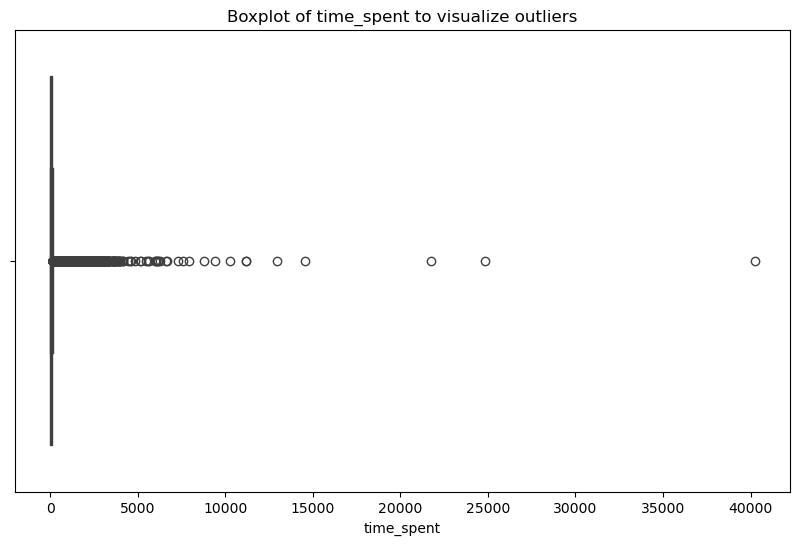

Unique visitor_id records:
        client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age gendr  \
300510    3561384             4.0              56.0      59.5     U   
76889     7338123             7.0              88.0      23.5     M   
251788    2478628            16.0             198.0      47.0     F   
148160     105007             9.0             118.0      35.0     F   
226828    5623007            16.0             202.0      78.0     M   

        num_accts        bal  calls_6_mnth  logons_6_mnth variation  \
300510        2.0   63130.44           6.0            9.0      Test   
76889         2.0   26436.73           6.0            9.0      Test   
251788        2.0   32456.28           2.0            5.0      Test   
148160        2.0   34897.47           3.0            6.0   Control   
226828        2.0  146827.14           5.0            8.0   Control   

                   visitor_id                      visit_id process_step  \
300510   451664975_1722933822  100012776_37

In [203]:
# Boxplot to visualize time_spent outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['time_spent'])
plt.title('Boxplot of time_spent to visualize outliers')
plt.show()

# Handle duplicates in visitor_id (optional)
df_clean_unique = df_clean.drop_duplicates(subset='visitor_id')
print(f"Unique visitor_id records:\n{df_clean_unique.head()}\n")

# Handling missing or unusual values in 'gendr' column
df_clean['gendr'] = df_clean['gendr'].replace({'U': 'Unknown', 'X': 'Other'})
print(f"Updated 'gendr' column values:\n{df_clean['gendr'].value_counts()}\n")

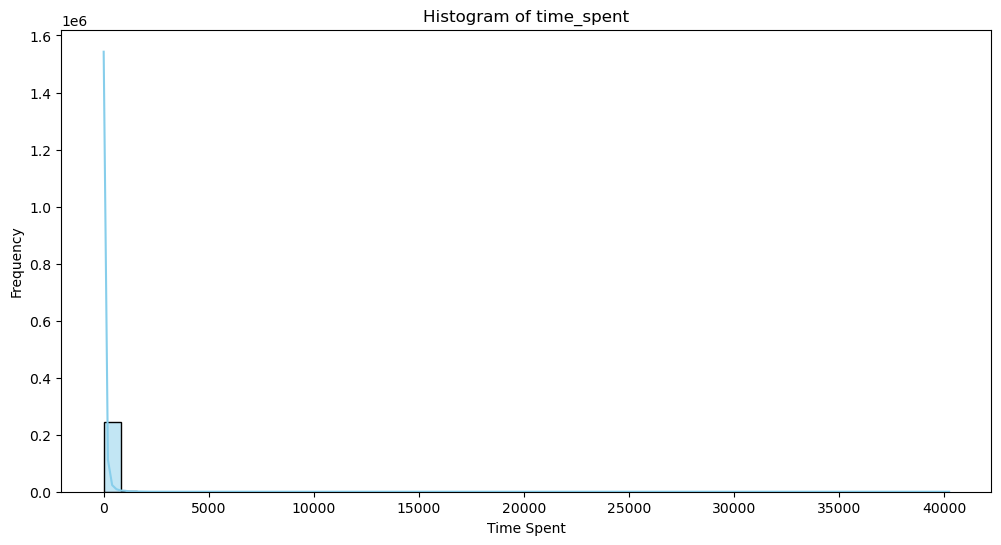

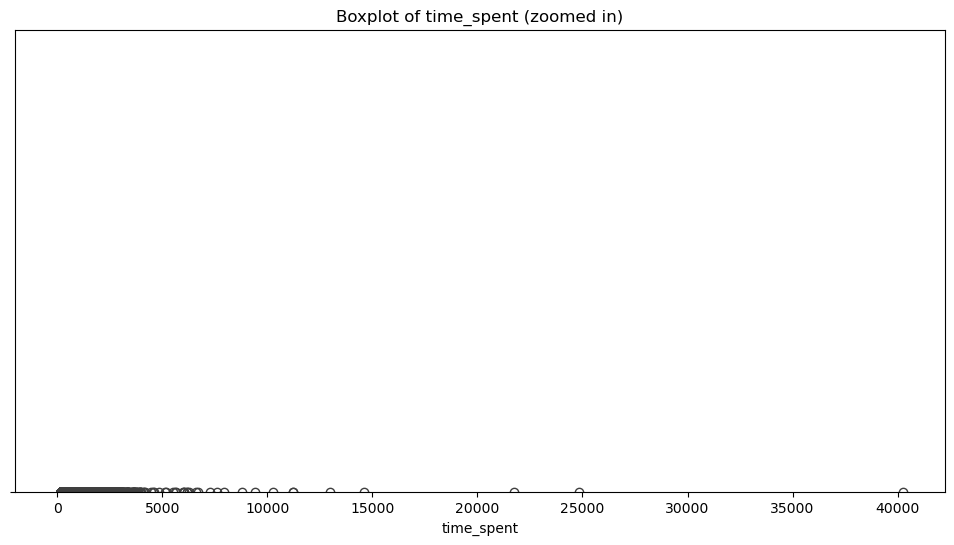

In [205]:
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['time_spent'], kde=True, bins=50, color='skyblue')
plt.title('Histogram of time_spent')
plt.xlabel('Time Spent')
plt.ylabel('Frequency')
plt.show()

# Alternatively, a boxplot with adjusted y-axis limits to zoom in on the majority of the data
plt.figure(figsize=(12, 6))
sns.boxplot(x=df_clean['time_spent'])
plt.title('Boxplot of time_spent (zoomed in)')
plt.ylim(0, 500)  # You can adjust this range based on the values in your data
plt.show()

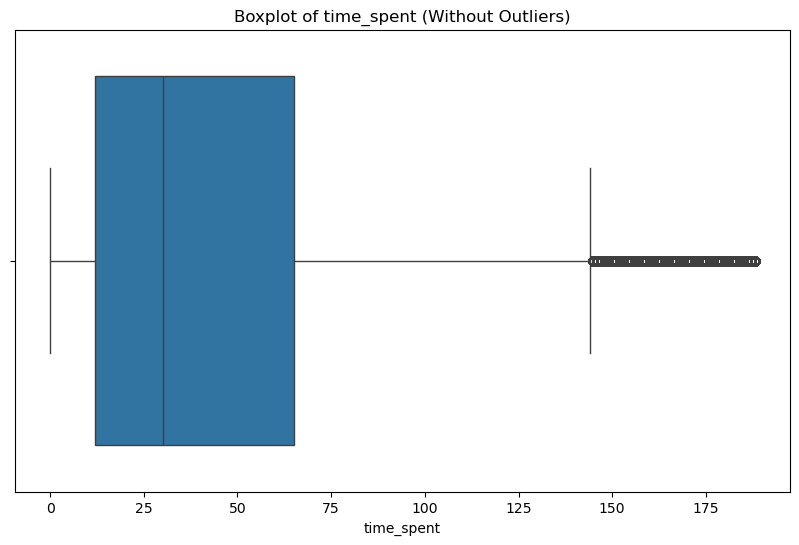

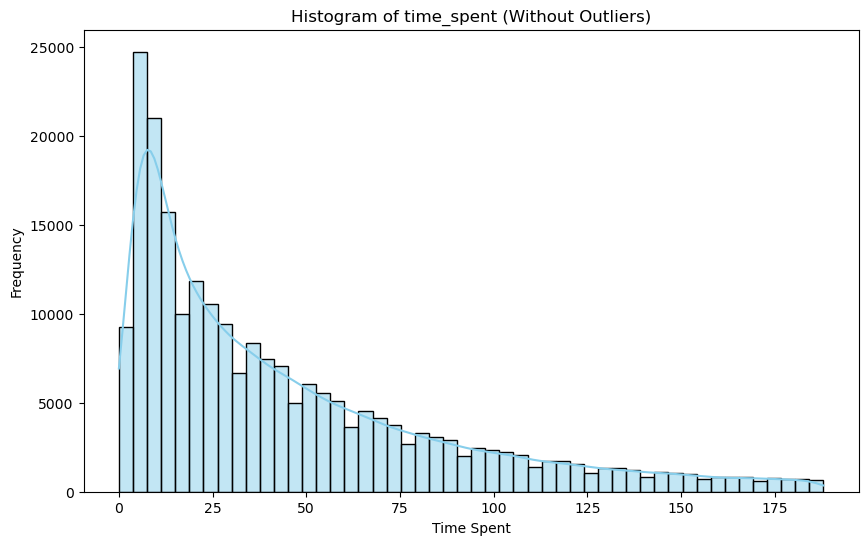

Unique visitor_id records:
        client_id  clnt_tenure_yr  clnt_tenure_mnth  clnt_age    gendr  \
300510    3561384             4.0              56.0      59.5  Unknown   
76889     7338123             7.0              88.0      23.5        M   
251788    2478628            16.0             198.0      47.0        F   
148160     105007             9.0             118.0      35.0        F   
226828    5623007            16.0             202.0      78.0        M   

        num_accts        bal  calls_6_mnth  logons_6_mnth variation  \
300510        2.0   63130.44           6.0            9.0      Test   
76889         2.0   26436.73           6.0            9.0      Test   
251788        2.0   32456.28           2.0            5.0      Test   
148160        2.0   34897.47           3.0            6.0   Control   
226828        2.0  146827.14           5.0            8.0   Control   

                   visitor_id                      visit_id process_step  \
300510   451664975_172293

/var/folders/87/8lkk6ykj1_74chh73s5bkg8r0000gn/T/ipykernel_46847/3033785143.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean_no_outliers['gendr'] = df_clean_no_outliers['gendr'].replace({'U': 'Unknown', 'X': 'Other'})


In [209]:

# Function to detect outliers using IQR (Interquartile Range)
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1  # Interquartile Range
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Return rows where the values in the column are outside of the IQR bounds
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

# Step 1: Remove outliers from 'time_spent' using IQR method
outliers_time_spent = detect_outliers(df_clean, 'time_spent')
df_clean_no_outliers = df_clean[~df_clean.index.isin(outliers_time_spent.index)]

# Step 2: Visualize the 'time_spent' column without outliers

# Boxplot to visualize time_spent without outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean_no_outliers['time_spent'])
plt.title('Boxplot of time_spent (Without Outliers)')
plt.show()

# Histogram with KDE (Kernel Density Estimate) to visualize the distribution of time_spent without outliers
plt.figure(figsize=(10, 6))
sns.histplot(df_clean_no_outliers['time_spent'], kde=True, bins=50, color='skyblue')
plt.title('Histogram of time_spent (Without Outliers)')
plt.xlabel('Time Spent')
plt.ylabel('Frequency')
plt.show()

# Handle duplicates in visitor_id (optional)
df_clean_unique = df_clean_no_outliers.drop_duplicates(subset='visitor_id')
print(f"Unique visitor_id records:\n{df_clean_unique.head()}\n")

# Handling missing or unusual values in 'gendr' column
df_clean_no_outliers['gendr'] = df_clean_no_outliers['gendr'].replace({'U': 'Unknown', 'X': 'Other'})
print(f"Updated 'gendr' column values:\n{df_clean_no_outliers['gendr'].value_counts()}\n")


# age hypothesis


In [426]:
from scipy.stats import ttest_ind


completed_process = df_clean[df_clean['process_step'] == 'confirm']

# Separate users into Test and Control groups
test_group = completed_process[completed_process['variation'] == 'Test']
control_group = completed_process[completed_process['variation'] == 'Control']

# Calculate average age for each group
mean_age_test = test_group['clnt_age'].mean()
mean_age_control = control_group['clnt_age'].mean()

print(f"Mean Age for Test Group: {mean_age_test:.2f}")
print(f"Mean Age for Control Group: {mean_age_control:.2f}")

# Perform t-test to compare mean ages between the two groups
t_stat, p_value = ttest_ind(test_group['clnt_age'].dropna(), control_group['clnt_age'].dropna())

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

Mean Age for Test Group: 47.97
Mean Age for Control Group: 47.71
T-statistic: 1.6943
P-value: 0.0902


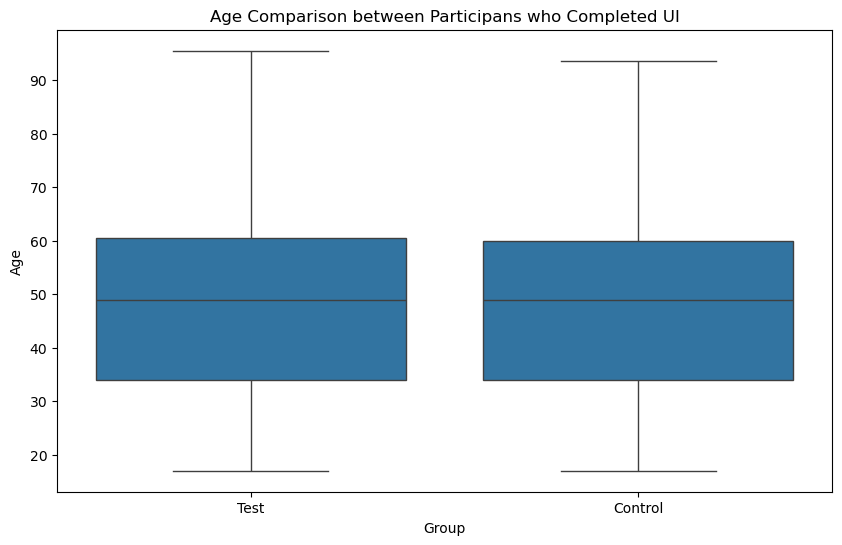

In [449]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='variation', y='clnt_age', data=completed_process)
plt.title('Age Comparison between Participans who Completed UI')
plt.xlabel('Group')
plt.ylabel('Age')
plt.savefig('age_comparison_between_.png')

plt.show()

In [430]:
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average age between the Test and Control groups who completed the process.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average age between the Test and Control groups who completed the process.")

Fail to reject the null hypothesis: There is no significant difference in the average age between the Test and Control groups.


In [ ]:
df_clean.to_csv("clean_data_v1.csv", index=False)